# EDA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Italian Olives

![](Italy.png)

I found this data set in the RGGobi book (http://www.ggobi.org/book/), from which the above diagram is taken. It has "the percentage composition of fatty acids
found in the lipid fraction of Italian olive oils', with oils from 3 regions of Italy: the North, the South, and Sardinia. The regions themselves are subdivided into areas as shown in the map above. The source for this data is:

>Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214.

## Exploratory Viz

In [4]:
df = pd.read_csv("local-olives-cleaned.csv")
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South


### exploring globally

In [5]:
pd.crosstab(df.areastring, df.regionstring)

regionstring,North,Sardinia,South
areastring,,,
Calabria,0,0,56
Coast-Sardinia,0,33,0
East-Liguria,50,0,0
Inland-Sardinia,0,65,0
North-Apulia,0,0,25
Sicily,0,0,36
South-Apulia,0,0,206
Umbria,51,0,0
West-Liguria,50,0,0


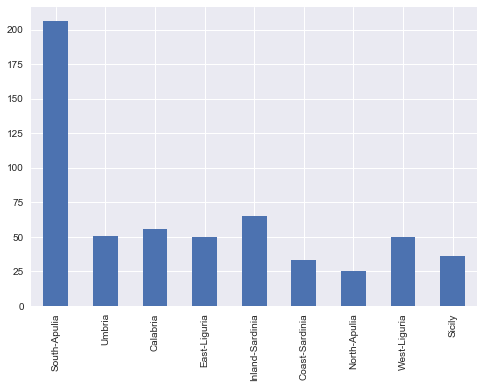

In [6]:
pd.value_counts(df.areastring, sort=False).plot(kind="bar");

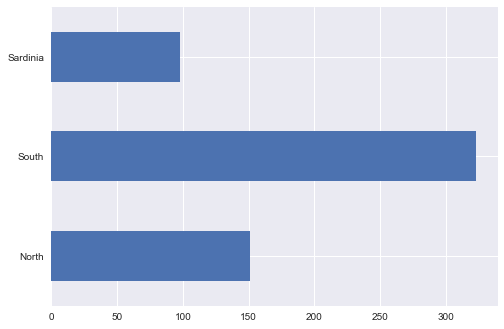

In [7]:
pd.value_counts(df.regionstring, sort=False).plot(kind="barh");

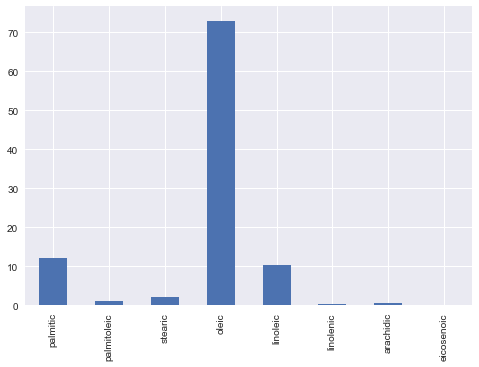

In [9]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
df[acidlist].median().plot(kind="bar");

Or one can use `aggregate` to pass an arbitrary function of to the sub-dataframe. The function is applied columnwise.

In [10]:
dfbymean=df.groupby("regionstring").aggregate(np.mean)
dfbymean.head()

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
regionstring,,,,,,,,,,
North,3.0,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735
Sardinia,2.0,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
South,1.0,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220


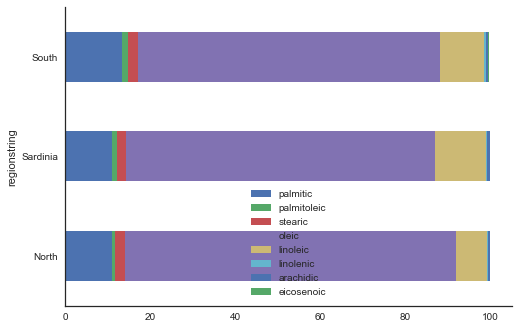

In [11]:
with sns.axes_style("white", {'grid':False}):
    dfbymean[acidlist].plot(kind='barh', stacked=True);
    sns.despine()

## Figuring the dataset by Region

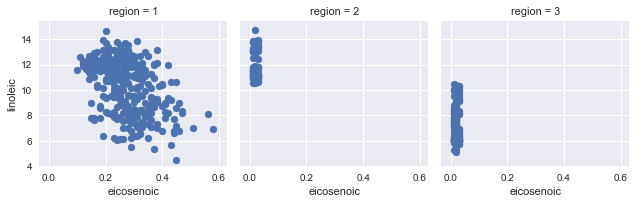

In [12]:
g=sns.FacetGrid(df, col="region")
g.map(plt.scatter,"eicosenoic", "linoleic");

Clearly, region 1 or the South can visually be separated out by `eicosenoic` fraction itself.

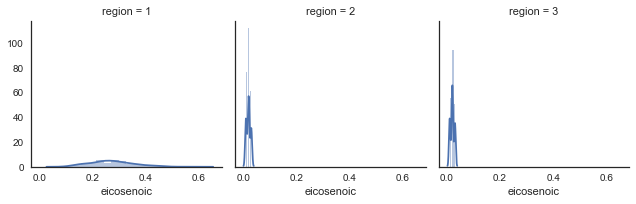

In [13]:
with sns.axes_style("white"):
    g=sns.FacetGrid(df, col="region")
    g.map(sns.distplot, "eicosenoic")

We make a SPLOM using `seaborn` to see in what space the regions may be separated. Note that linoleic and oleic seem promising. And perhaps arachidic paired with eicosenoic.

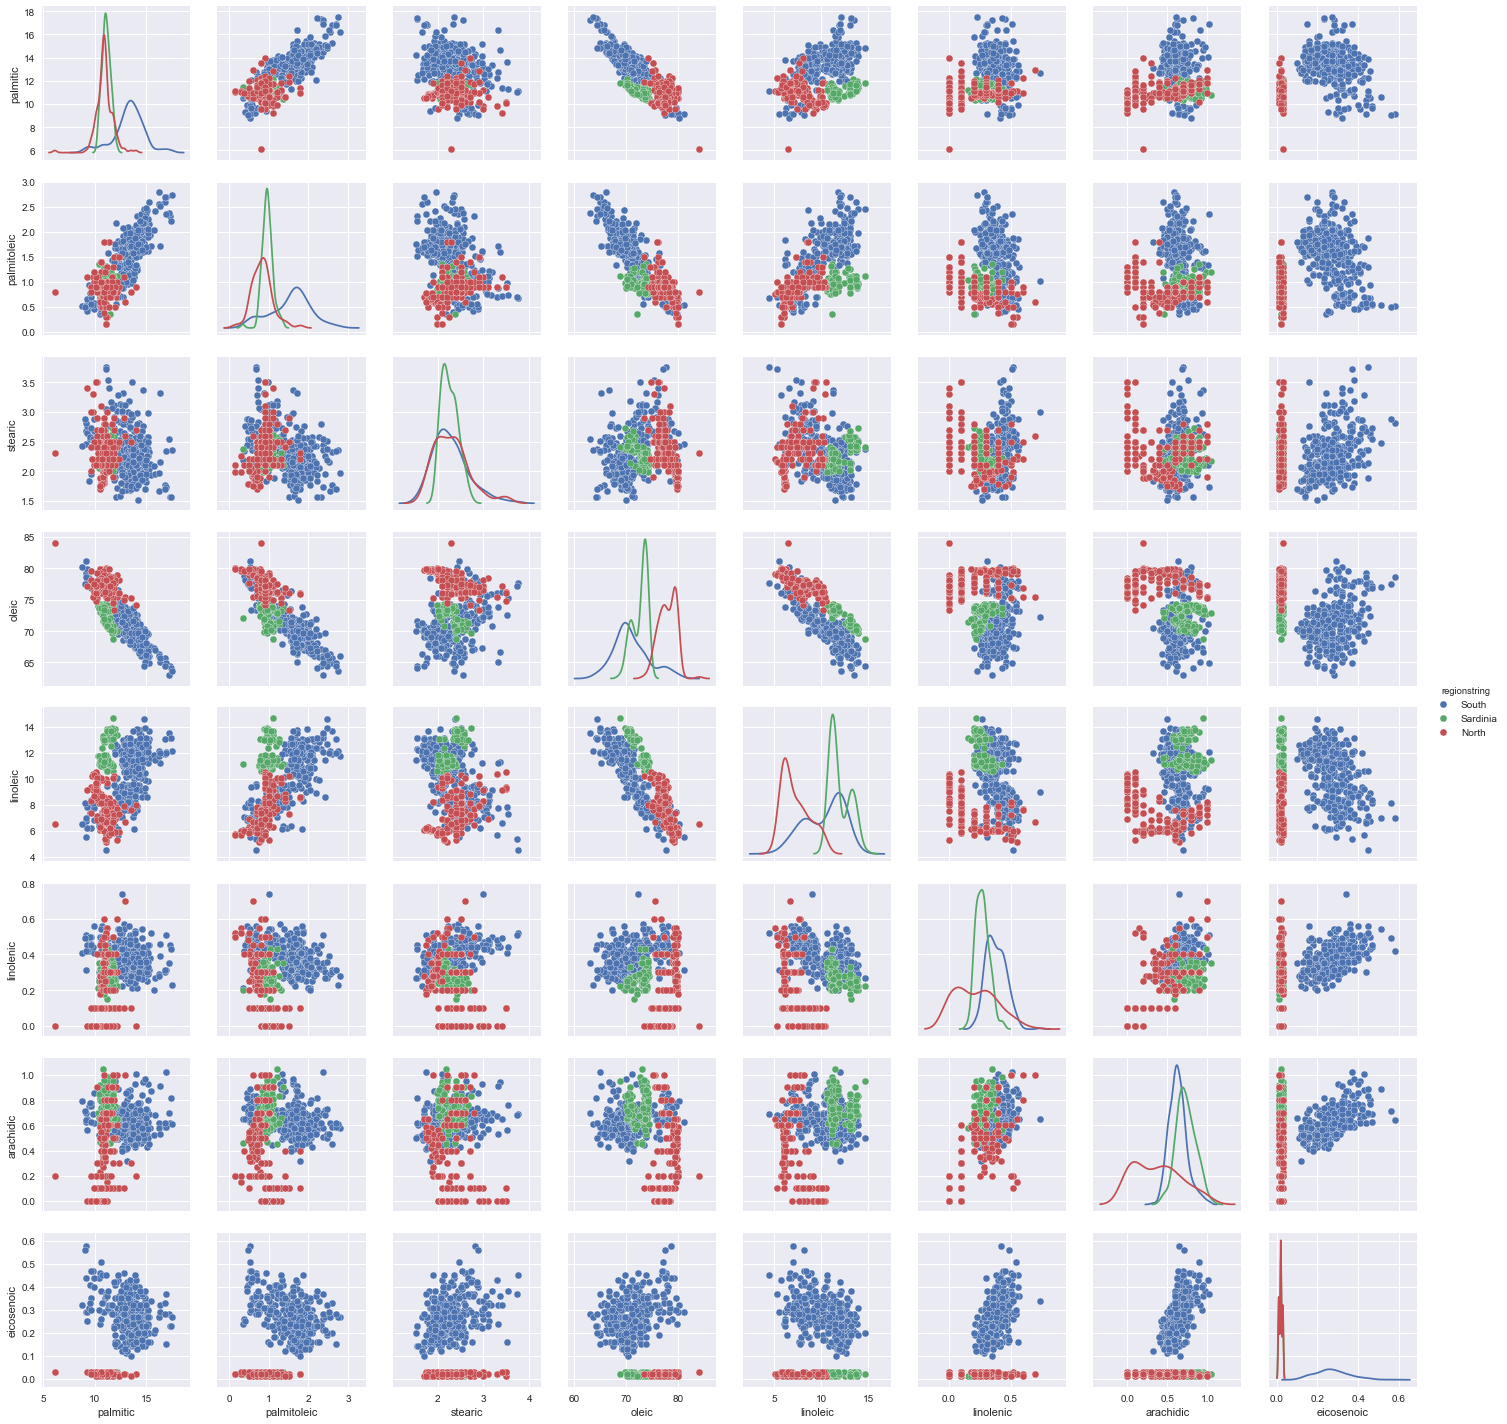

In [14]:
sns.pairplot(df, vars=acidlist, hue="regionstring", size=2.5, diag_kind='kde');

Pandas supports conditional indexing: <a href="http://pandas.pydata.org/pandas-docs/dev/indexing.html#boolean-indexing">documentation</a>. Lets use it to follow up on the clear pattern of Southern oils seeeming to be separable by just the `eicosenoic` feature.

**Indeed this is the case!** Can also be seen using parallel co-ordinates:

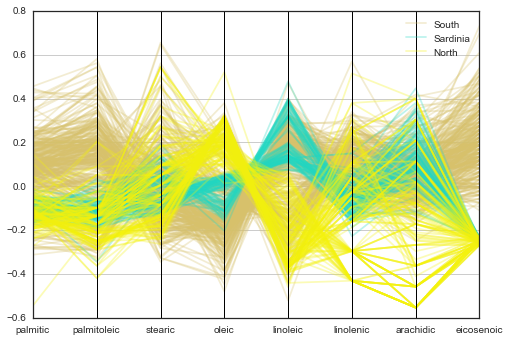

In [40]:
from pandas.tools.plotting import parallel_coordinates
dfna=df[acidlist]
#normalizing by range
dfna_norm = (dfna - dfna.mean()) / (dfna.max() - dfna.min())
with sns.axes_style("white"):
    parallel_coordinates(df[['regionstring']].join(dfna_norm), 'regionstring', alpha=0.3)

## Figuring the South of Italy by Area

In [15]:
dfsouth=df[df.regionstring=='South']
dfsouth.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South


We make a couple of SPLOM's, one with sicily and one without sicily, to see whats separable. Sicily seems to be a problem. As before, see the KDE's first to see if separability exists and then let the eye look for patterns.

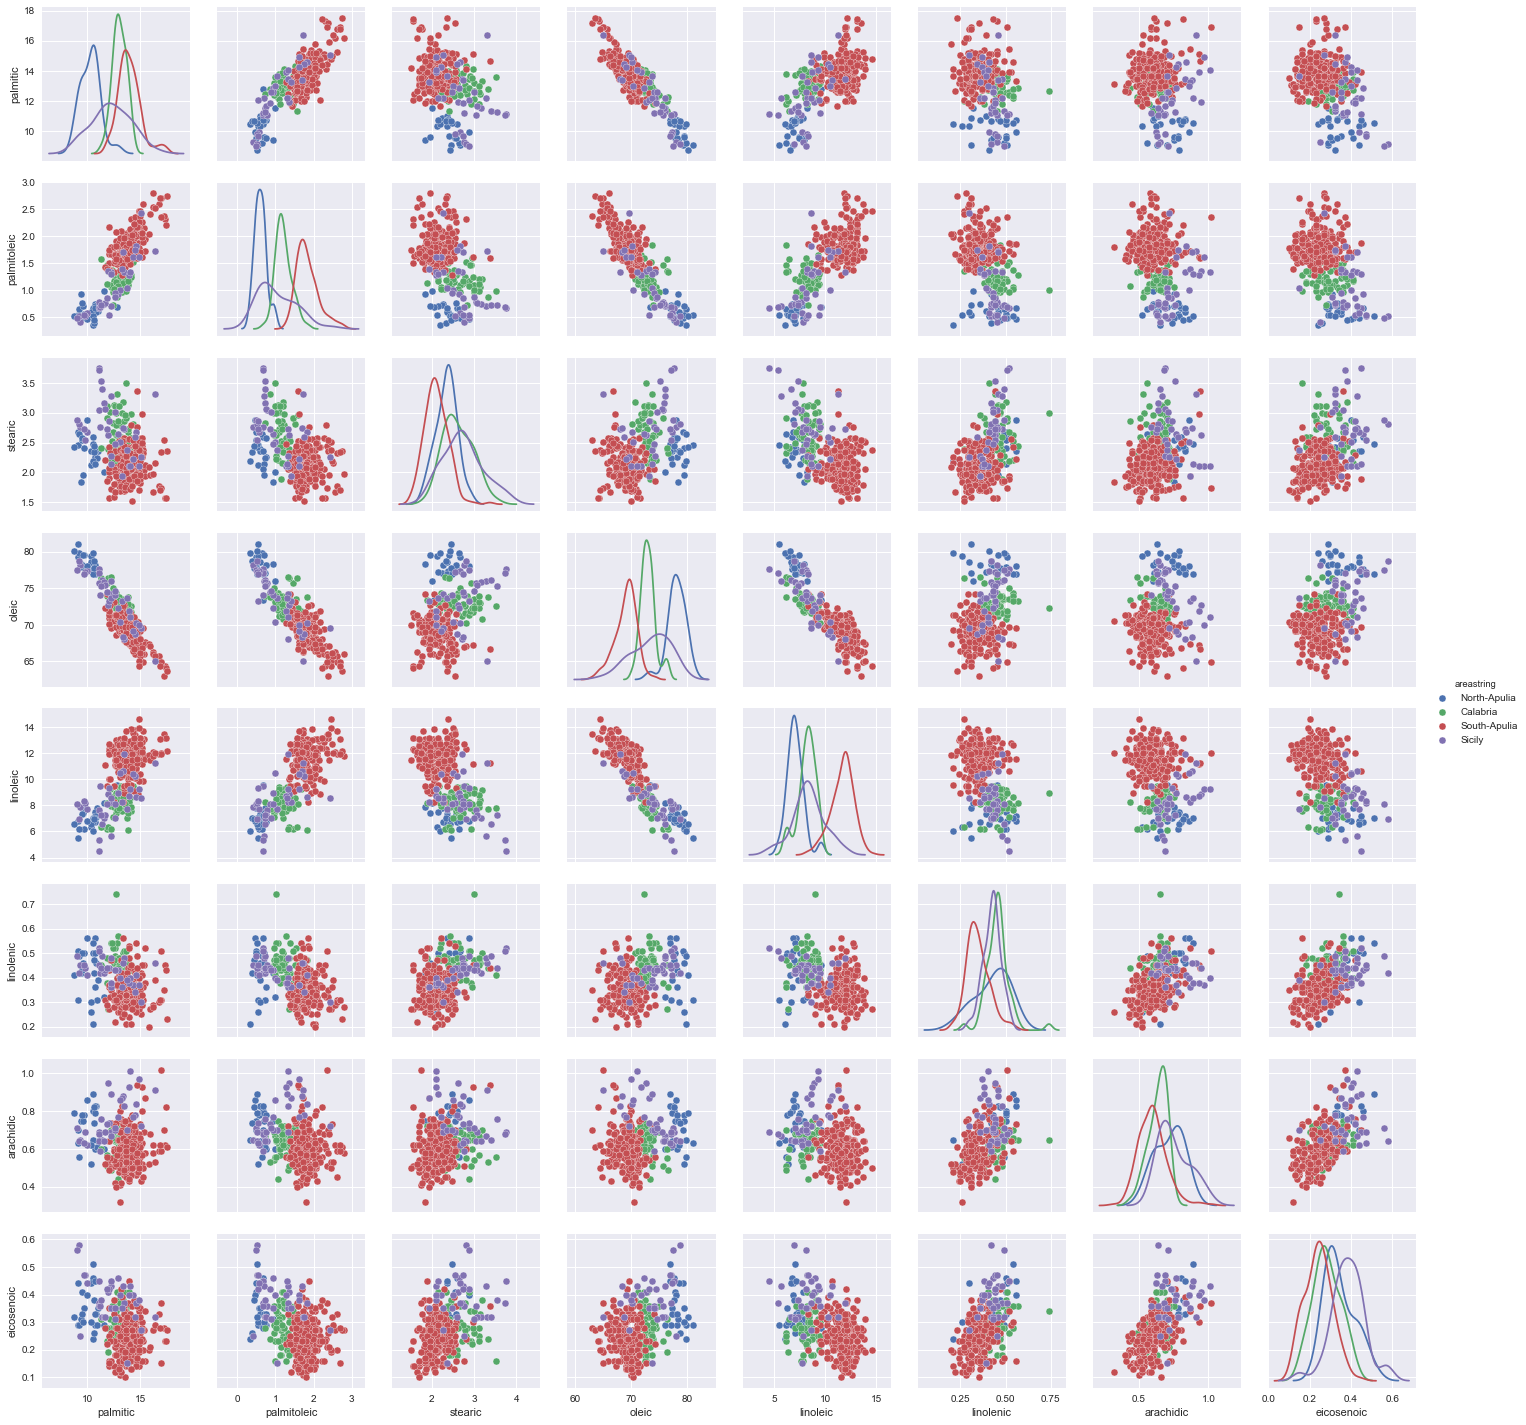

In [16]:
sns.pairplot(dfsouth, hue="areastring", size=2.5, vars=acidlist, diag_kind='kde');

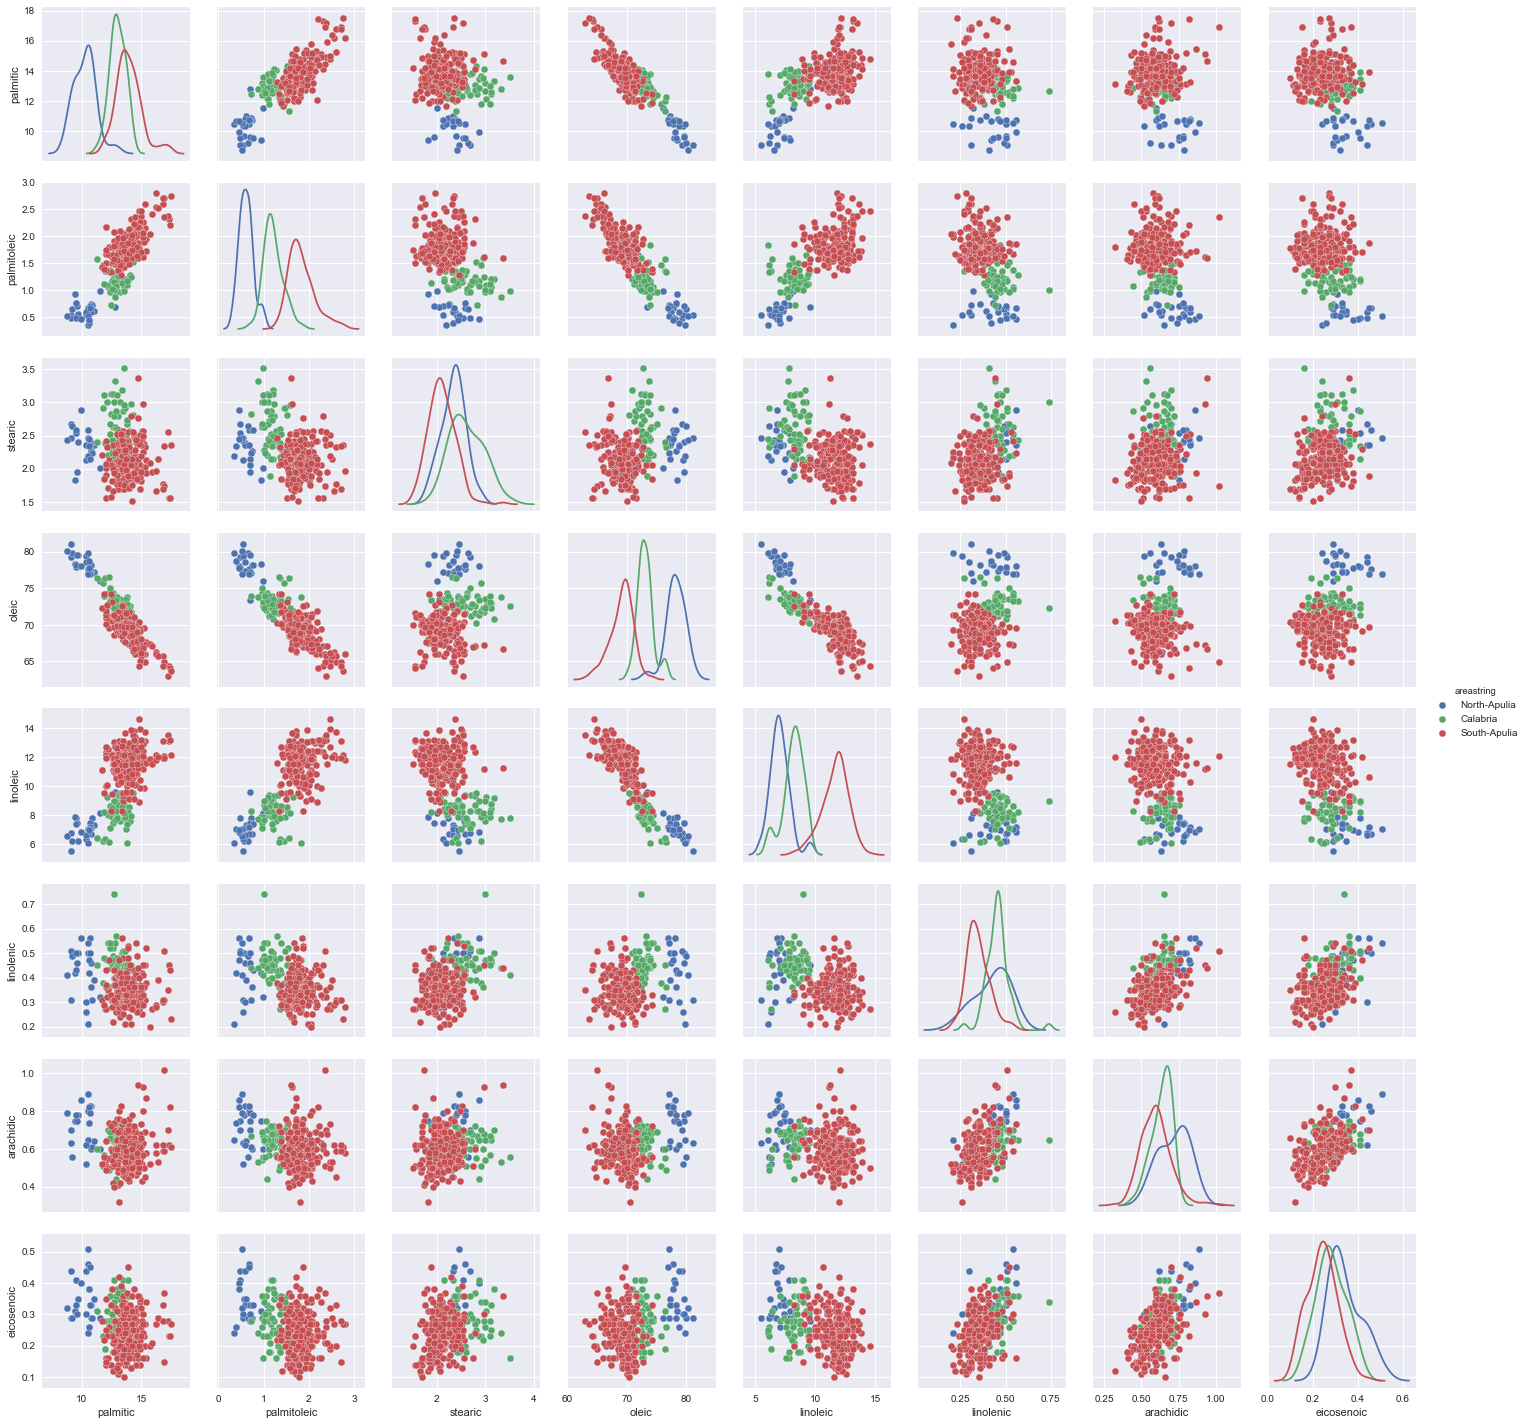

In [17]:
sns.pairplot(dfsouth[dfsouth.areastring!="Sicily"], hue="areastring", size=2.5, vars=acidlist, diag_kind='kde');

Seems that combinations of oleic, palmitic, palmitoleic might be useful?